<a href="https://colab.research.google.com/github/Moe-phantom/Moe-phantom/blob/main/python_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
file_path = '/Scenario 1 dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
null_pctg = df.isnull().sum() / len(df)
print(null_pctg)

month                  0.0
temperature_city1      0.0
temperature_city2      0.0
temperature_city3      0.0
precipitation_city1    0.0
precipitation_city2    0.0
precipitation_city3    0.0
dtype: float64


as you can see the data does not contain any Null values

In [ ]:
print(df.dtypes)
print(f'the data has shape of {df.shape}')
df.describe()

month                   object
temperature_city1      float64
temperature_city2      float64
temperature_city3      float64
precipitation_city1    float64
precipitation_city2    float64
precipitation_city3    float64
dtype: object
the data has shape of (60, 7)


,temperature_city1,temperature_city2,temperature_city3,precipitation_city1,precipitation_city2,precipitation_city3
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,14.226833,19.978167,10.367500,71.136000,79.547167,60.565000
std,4.542713,5.660592,3.984164,20.727208,26.110595,11.422221
min,5.200000,4.280000,3.570000,29.500000,-1.030000,38.280000
25%,11.565000,17.087500,6.837500,55.615000,63.422500,51.585000
50%,13.850000,19.815000,10.920000,73.265000,79.385000,59.770000
75%,17.030000,22.232500,13.135000,82.767500,97.255000,69.210000
max,24.260000,34.780000,20.880000,147.050000,133.330000,91.390000


In [ ]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               '1970-01-01 00:00:00.000000010',
               '1970-01-01 00:00:00.000000011',
               '1970-01-01 00:00:00.000000012',
               '1970-01-01 00:00:00.000000013',
               '1970-01-01 00:00:00.000000014',
               '1970-01-01 00:00:00.000000015',
               '1970-01-01 00:00:00.000000016',
               '1970-01-01 00:00:00.000000017',
               '1970-01-01 00:00:00.000000018',
               '1970-01-01 00:00:00.000000019',
               '1970-01-01 00:00:00.0000

Outliers in Each Column:
temperature_city1:
Series([], Name: temperature_city1, dtype: float64)

temperature_city2:
14     4.28
19     8.07
46    31.32
50     8.49
53    34.78
Name: temperature_city2, dtype: float64

temperature_city3:
Series([], Name: temperature_city3, dtype: float64)

precipitation_city1:
29    147.05
Name: precipitation_city1, dtype: float64

precipitation_city2:
22   -1.03
Name: precipitation_city2, dtype: float64

precipitation_city3:
Series([], Name: precipitation_city3, dtype: float64)



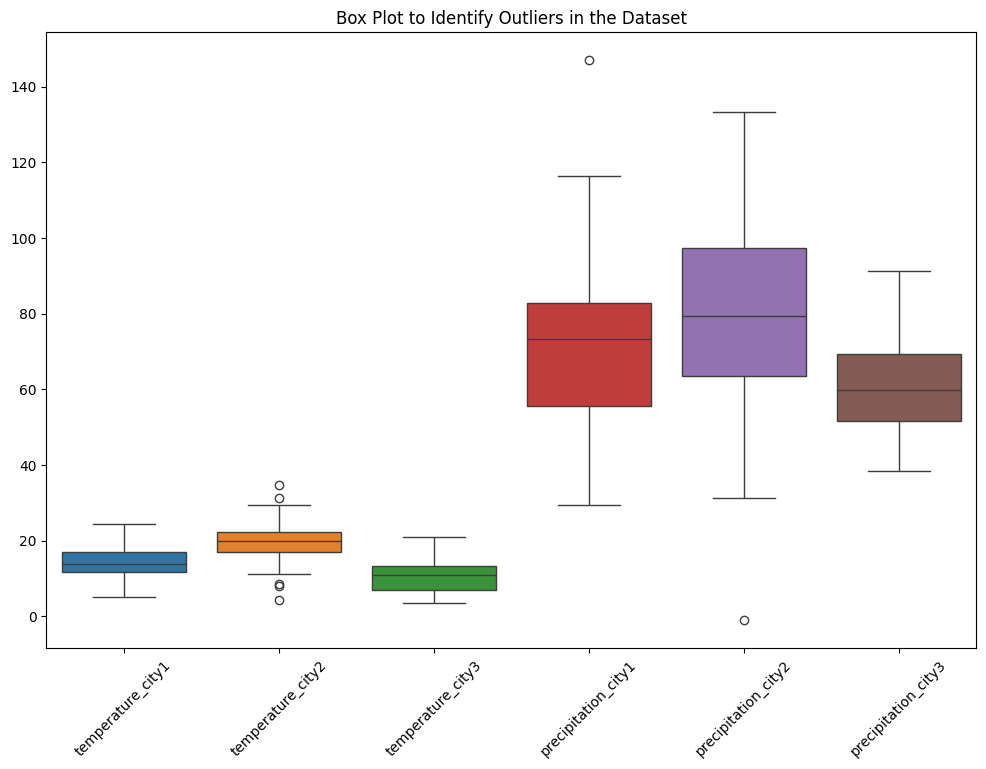

In [ ]:


# Function to identify outliers using IQR
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Identify outliers in each column
outliers = {}
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        outliers[col] = identify_outliers(df[col])

print("Outliers in Each Column:")
for col, outlier_values in outliers.items():
    print(f"{col}:")
    print(outlier_values)
    print()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot to Identify Outliers in the Dataset')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# List of columns to check for outliers
columns = ['temperature_city1', 'temperature_city2', 'temperature_city3',
           'precipitation_city1', 'precipitation_city2', 'precipitation_city3']

# Initialize the outlier DataFrame
AOL_df = df.copy()

# Calculate lower and upper bounds for each column
lower_bound = []
upper_bound = []
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound.append(Q1 - 1.5 * IQR)
    upper_bound.append(Q3 + 1.5 * IQR)

# Flag outliers in each column
for ix, col in enumerate(columns):
    AOL_df[f'{col}_ol'] = (df[col] < lower_bound[ix]) | (df[col] > upper_bound[ix])

# Print only the actual outliers
for col in columns:
    outliers = AOL_df.loc[AOL_df[f'{col}_ol'], [col, f'{col}_ol']]
    if not outliers.empty:
        print(outliers)
        print('=' * 50)

    temperature_city2  temperature_city2_ol
14               4.28                  True
19               8.07                  True
46              31.32                  True
50               8.49                  True
53              34.78                  True
    precipitation_city1  precipitation_city1_ol
29               147.05                    True
    precipitation_city2  precipitation_city2_ol
22                -1.03                    True


In [ ]:
from scipy.stats import skew

for col in columns[1:]:
  print(f"{col} skewness {skew(df[f'{col}'].values, axis=0, bias=True)}")

temperature_city2 skewness -0.08934838295098481
temperature_city3 skewness 0.33669169757266476
precipitation_city1 skewness 0.6659927867353971
precipitation_city2 skewness -0.21968665837026075
precipitation_city3 skewness 0.23704919377415218


In [ ]:
D9 = AOL_df["temperature_city2"].quantile(0.90)
D1 = AOL_df["temperature_city2"].quantile(0.10)

AOL_df.loc[AOL_df["temperature_city2"] > D9, "temperature_city2"] = D9
AOL_df.loc[AOL_df["temperature_city2"] < D1, "temperature_city2"] = D1

AOL_df.loc[AOL_df['temperature_city2_ol'], ['temperature_city2']]

,temperature_city2
14,12.973
19,12.973
46,26.988
50,12.973
53,26.988


In [ ]:
AOL_df.loc[AOL_df["precipitation_city2_ol"], "precipitation_city2"] = AOL_df["precipitation_city2"].quantile(0.25)
AOL_df.loc[AOL_df["precipitation_city2_ol"], ["month","precipitation_city2", "precipitation_city2_ol"]]

,month,precipitation_city2,precipitation_city2_ol
22,2019-11-30,63.4225,True


In [ ]:
# precipitation_city1
# Replacing upper outliers that showed significant impact on the the skewness of precipitation_city1
# with the upper %75 quartile

AOL_df.loc[AOL_df["precipitation_city1_ol"], "precipitation_city1"] = AOL_df["precipitation_city1"].quantile(0.75)
AOL_df.loc[AOL_df["precipitation_city1_ol"], ["month","precipitation_city1", "precipitation_city1_ol"]]

,month,precipitation_city1,precipitation_city1_ol
29,2020-06-30,82.7675,True


Rechecking ... Outliers in Each Column:
temperature_city1:
Series([], Name: temperature_city1, dtype: float64)

temperature_city2:
Series([], Name: temperature_city2, dtype: float64)

temperature_city3:
Series([], Name: temperature_city3, dtype: float64)

precipitation_city1:
Series([], Name: precipitation_city1, dtype: float64)

precipitation_city2:
Series([], Name: precipitation_city2, dtype: float64)

precipitation_city3:
Series([], Name: precipitation_city3, dtype: float64)



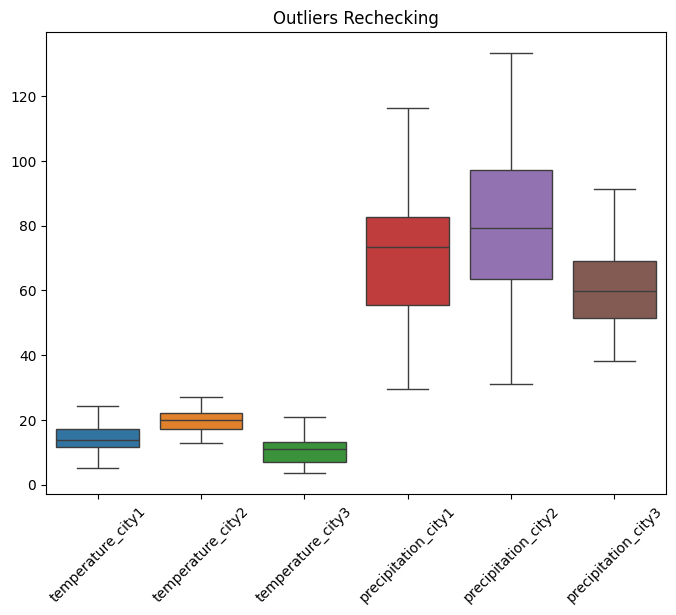

In [ ]:
# this code to check if there is still outliers or not
df = AOL_df

outliers = {}
for col in df.columns:
    if col.endswith('_ol') or col == "month":
        continue  # Skip the '_ol' columns and 'month' column
    outliers[col] = identify_outliers(df[col])

print("Rechecking ... Outliers in Each Column:")
for col, outlier_values in outliers.items():
    print(f"{col}:")
    print(outlier_values)
    print()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[[col for col in columns if pd.api.types.is_numeric_dtype(df[col])]])
plt.title('Outliers Rechecking')
plt.xticks(rotation=45)
plt.show()


In [ ]:
ol_cols = [col for col in AOL_df.columns if col.endswith('_ol')]
AOL_df_numeric = AOL_df.drop(columns=ol_cols)

In [ ]:
AOL_df_numeric.head()

,month,temperature_city1,temperature_city2,temperature_city3,precipitation_city1,precipitation_city2,precipitation_city3
0,2018-01-31,17.48,17.120,13.16,82.51,60.19,47.57
1,2018-02-28,14.31,18.890,6.36,52.86,77.13,51.60
2,2018-03-31,18.24,13.360,15.61,48.58,92.62,71.21
3,2018-04-30,22.62,12.973,4.39,79.65,101.64,69.16
4,2018-05-31,13.83,24.880,12.35,65.53,49.99,59.69


In [ ]:

df = AOL_df_numeric

# List of columns for temperature and precipitation
temperature_cols = ['temperature_city1', 'temperature_city2', 'temperature_city3']
precipitation_cols = ['precipitation_city1', 'precipitation_city2', 'precipitation_city3']

#  summary statistics for temperature
temp_stats = df[temperature_cols].agg(['mean', 'median', 'std'])
print("\t\tTemperature Statistics:\n")
print(temp_stats)

#  summary statistics for precipitation
precip_stats = df[precipitation_cols].agg(['mean', 'median', 'std'])
print("\n\t\tPrecipitation Statistics:\n")
print(precip_stats)

		Temperature Statistics:

        temperature_city1  temperature_city2  temperature_city3
mean            14.226833          20.005600          10.367500
median          13.850000          19.815000          10.920000
std              4.542713           4.302643           3.984164

		Precipitation Statistics:

        precipitation_city1  precipitation_city2  precipitation_city3
mean              70.064625            80.621375            60.565000
median            73.265000            79.385000            59.770000
std               18.250098            23.978139            11.422221


Temperature:

Cities 1 and 2 have similar temperature distributions, with City 2 being warmer on average.

City 3 is significantly cooler and has slightly less variability in temperature.

Precipitation:

City 2 has the highest average precipitation and the most variability.

City 3 has the lowest average precipitation and the least variability.

City 1 is intermediate in both average precipitation and variability.

In [ ]:
correlation_matrix = df.drop(columns=['month']).corr()

# Extract correlation between temperature and precipitation for each city
for i in range(3):
    temp_col = temperature_cols[i]
    precip_col = precipitation_cols[i]
    correlation = correlation_matrix.loc[temp_col, precip_col]
    print(f"Correlation between {temp_col} and {precip_col}: {correlation:.2f}")


Correlation between temperature_city1 and precipitation_city1: 0.16
Correlation between temperature_city2 and precipitation_city2: 0.01
Correlation between temperature_city3 and precipitation_city3: -0.28




1.  A weak correleation spotted in the city 1 with, the percipation increase sligthly as the temp increase,

2.   No correlation between city2 and percipation 2


3. a weak negative correlation between city 3 and perciptaion 3





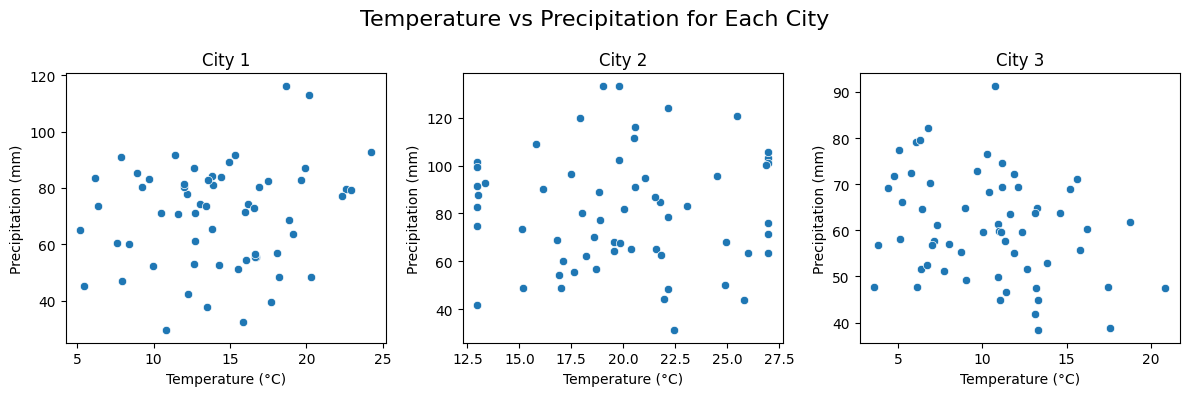

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("Temperature vs Precipitation for Each City", fontsize=16)

# Scatter plot for City 1
sns.scatterplot(ax=axes[0], x='temperature_city1', y='precipitation_city1', data=df)
axes[0].set_title("City 1")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Precipitation (mm)")

# Scatter plot for City 2
sns.scatterplot(ax=axes[1], x='temperature_city2', y='precipitation_city2', data=df)
axes[1].set_title("City 2")
axes[1].set_xlabel("Temperature (°C)")
axes[1].set_ylabel("Precipitation (mm)")

# Scatter plot for City 3
sns.scatterplot(ax=axes[2], x='temperature_city3', y='precipitation_city3', data=df)
axes[2].set_title("City 3")
axes[2].set_xlabel("Temperature (°C)")
axes[2].set_ylabel("Precipitation (mm)")

plt.tight_layout()
plt.show()

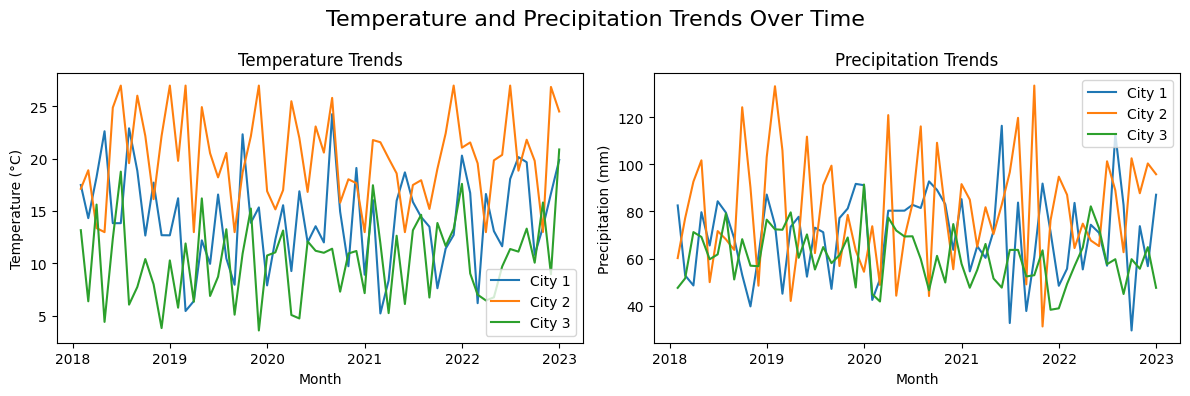

In [ ]:
# Convert 'month'
df['month'] = pd.to_datetime(df['month'])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Temperature and Precipitation Trends Over Time", fontsize=16)

# Temperature trends
sns.lineplot(ax=axes[0], x='month', y='temperature_city1', data=df, label='City 1')
sns.lineplot(ax=axes[0], x='month', y='temperature_city2', data=df, label='City 2')
sns.lineplot(ax=axes[0], x='month', y='temperature_city3', data=df, label='City 3')
axes[0].set_title("Temperature Trends")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Temperature (°C)")
axes[0].legend()

# Precipitation trends
sns.lineplot(ax=axes[1], x='month', y='precipitation_city1', data=df, label='City 1')
sns.lineplot(ax=axes[1], x='month', y='precipitation_city2', data=df, label='City 2')
sns.lineplot(ax=axes[1], x='month', y='precipitation_city3', data=df, label='City 3')
axes[1].set_title("Precipitation Trends")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Precipitation (mm)")
axes[1].legend()

plt.tight_layout()
plt.show()

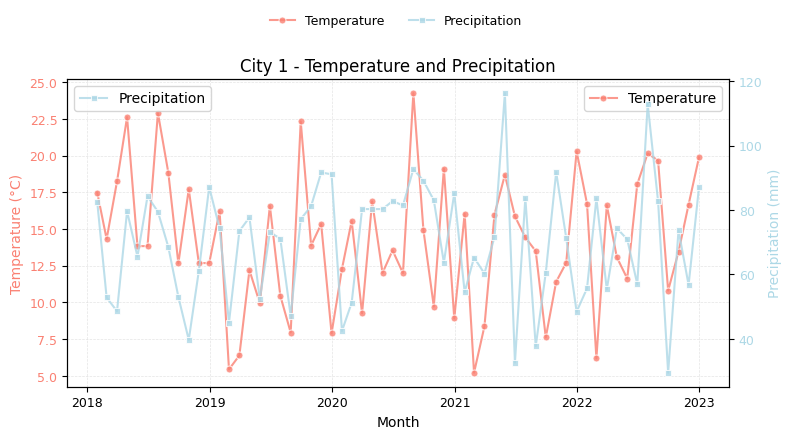

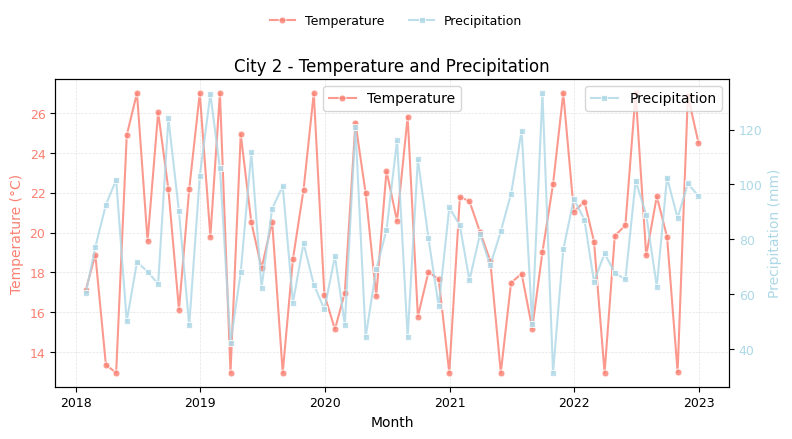

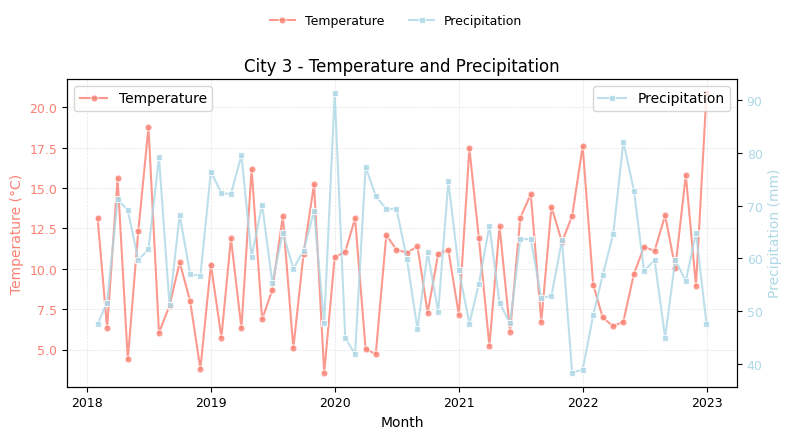

In [ ]:

# the List of cities and their respective columns for temperature and precipitation
cities = [
    {'name': 'City 1', 'temp_col': 'temperature_city1', 'precip_col': 'precipitation_city1'},
    {'name': 'City 2', 'temp_col': 'temperature_city2', 'precip_col': 'precipitation_city2'},
    {'name': 'City 3', 'temp_col': 'temperature_city3', 'precip_col': 'precipitation_city3'}
]


for city in cities:
    fig, ax1 = plt.subplots(figsize=(8, 4))
    sns.lineplot(
        x='month', y=city['temp_col'], data=df, ax=ax1,
        label='Temperature', color='salmon', linewidth=1.5, marker='o', markersize=5, alpha=0.8
    )
    ax1.set_title(f"{city['name']} - Temperature and Precipitation", fontsize=12, fontweight='medium')
    ax1.set_xlabel("Month", fontsize=10)
    ax1.set_ylabel("Temperature (°C)", fontsize=10, color='salmon')
    ax1.tick_params(axis='y', labelcolor='salmon', labelsize=9)
    ax1.tick_params(axis='x', labelsize=9)
    ax1.grid(color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.6)

    ax2 = ax1.twinx()
    sns.lineplot(
        x='month', y=city['precip_col'], data=df, ax=ax2,
        label='Precipitation', color='lightblue', linewidth=1.5, marker='s', markersize=5, alpha=0.8
    )
    ax2.set_ylabel("Precipitation (mm)", fontsize=10, color='lightblue')
    ax2.tick_params(axis='y', labelcolor='lightblue', labelsize=9)

    # legend
    fig.legend(loc="upper center", fontsize=9, ncol=2, bbox_to_anchor=(0.5, 1.1), frameon=False)
    plt.tight_layout(pad=1)
    plt.show()


Polynomial Coefficients: [-1.37880911e-04  7.88466388e-03 -1.32601474e-01  2.90733592e-01
  8.93984761e+00  2.04109186e+01]
Mean Squared Error (MSE): 304.61
R-squared (R2): 0.07


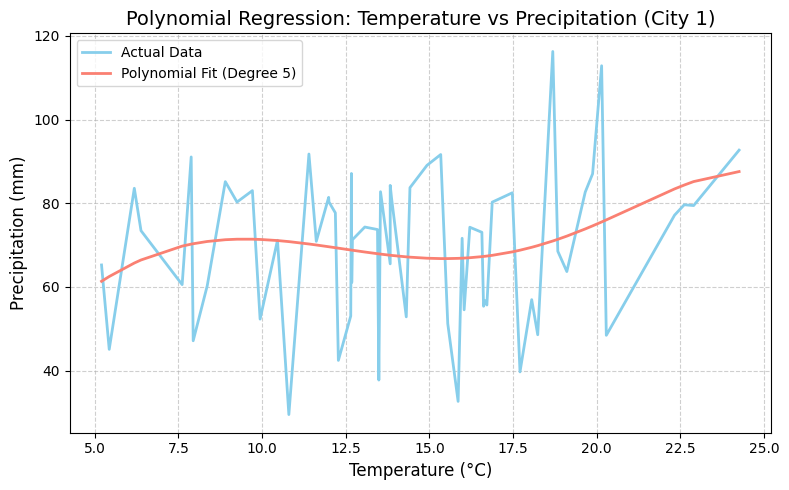

In [ ]:

# Sorting the data based on temperature_city1
df_sorted = df.sort_values(by='temperature_city1')

# Choose the predictor (X) and target (y)
X = df_sorted['temperature_city1']
y = df_sorted['precipitation_city1']

degree = 5

coefficients = np.polyfit(X, y, degree)
polynomial = np.poly1d(coefficients)

y_pred = polynomial(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Polynomial Coefficients: {coefficients}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(X, y, color='skyblue', label='Actual Data', linewidth=2)
plt.plot(X, y_pred, color='salmon', label=f'Polynomial Fit (Degree {degree})', linewidth=2)
plt.title("Polynomial Regression: Temperature vs Precipitation (City 1)", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Precipitation (mm)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The Temprature does not seem to be the determenent factor for the percipitaion, and for further improvement we might need to consider other factors like humadity but unfortunatilly it is not provided in this assignment